In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df_ads = pd.read_csv('fraud_ads.csv')
df_users = pd.read_csv('fraud_users.csv', dtype = {'phone': str, 'verifiedPhones': str})

In [4]:
df_ads.head(2)

,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt,publishedAt
0,128130024,23979422,85.249.20.236,МТЗ 82.1 2012 г.,auto.spec,"2012 г., трактор (Беларусь), дизель, с пробегом, Продам трактор МТЗ 82.1 2012 года в хорошем состоянии полностью рабочий доставка по Казахстану звоните на вацакп",NaN,NaN,NaN,2012.0,2350000,NaN,NaN,NaN,В наличии,Алматы,Алматинская область,2021-11-10T15:59:48+06:00,2021-11-10T16:20:59+06:00
1,128129428,23979422,85.249.20.236,Volkswagen Transporter 1999 г.,auto.car,"1999 г., Б/у минивэн, 2.5 л, дизель, КПП механика, с пробегом 155 000 км, синий, вложений не требует, Продам авто в хорошем состоянии не билось не красилась я владелец учёт kz продаю срочно звоните в любое время звоните вацакп",Volkswagen,Transporter,минивэн,1999.0,2250000,155000.0,2.5,С пробегом,В наличии,Алматы,Алматинская область,2021-11-10T15:48:30+06:00,2021-11-10T15:51:27+06:00


In [5]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50694 entries, 0 to 50693
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   advertId     50694 non-null  int64  
 1   userId       50694 non-null  int64  
 2   ip           50676 non-null  object 
 3   title        49448 non-null  object 
 4   category     50694 non-null  object 
 5   description  49435 non-null  object 
 6   mark         48666 non-null  object 
 7   model        46754 non-null  object 
 8   bodyType     46759 non-null  object 
 9   Year         47387 non-null  float64
 10  price        50694 non-null  int64  
 11  Milliage     43648 non-null  float64
 12  Vlolume      46760 non-null  float64
 13  Condition    46758 non-null  object 
 14  status       47394 non-null  object 
 15  City         49375 non-null  object 
 16  Region       49371 non-null  object 
 17  createdAt    50694 non-null  object 
 18  publishedAt  41617 non-null  object 
dtypes: f

In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16073 entries, 0 to 16072
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   globalId        16073 non-null  int64 
 1   email           16073 non-null  object
 2   phone           15337 non-null  object
 3   verifiedPhones  15341 non-null  object
 4   createdAt       16073 non-null  object
 5   blockedAt       16073 non-null  object
 6   advertsCount    16073 non-null  int64 
 7   userType        16073 non-null  object
dtypes: int64(2), object(6)
memory usage: 1004.7+ KB


In [7]:
df_users

,globalId,email,phone,verifiedPhones,createdAt,blockedAt,advertsCount,userType
0,1625093,yamaha-yamaha05@mail.ru,NaN,NaN,2015-03-07,2015-03-10,0,Обычный продавец
1,1636703,vip-mirabella103@mail.ru,NaN,NaN,2015-03-11,2015-03-13,0,Обычный продавец
2,1940947,totalsalesltd@gmail.com,NaN,NaN,2015-07-05,2015-07-07,0,Обычный продавец
3,2290121,9633139142@mail.ru,NaN,NaN,2015-10-20,2015-10-26,0,Обычный продавец
4,2089963,ygolichikhina@mail.ru,NaN,NaN,2015-08-24,2015-12-15,0,Обычный продавец
...,...,...,...,...,...,...,...,...
16068,29510684,29510684@auto.kolesa.kz,77471259752,77471259752,2023-04-03,2023-04-04,2,Обычный продавец
16069,29510080,29510080@auto.kolesa.kz,77471245267,77471245267,2023-04-03,2023-04-04,1,Обычный продавец
16070,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,2,Обычный продавец
16071,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-04-04,2023-04-04,2,Обычный продавец


In [8]:
df_users['createdAt'] = pd.to_datetime(df_users['createdAt'])
df_users['blockedAt'] = pd.to_datetime(df_users['blockedAt'])
df_users['year_created'] = df_users['createdAt'].dt.year
df_users['year_blocked'] = df_users['blockedAt'].dt.year

In [9]:
df_users['days_to_block'] = (df_users['blockedAt'] - df_users['createdAt']).dt.days

In [10]:
df_users.head()

,globalId,email,phone,verifiedPhones,createdAt,blockedAt,advertsCount,userType,year_created,year_blocked,days_to_block
0,1625093,yamaha-yamaha05@mail.ru,NaN,NaN,2015-03-07,2015-03-10,0,Обычный продавец,2015,2015,3
1,1636703,vip-mirabella103@mail.ru,NaN,NaN,2015-03-11,2015-03-13,0,Обычный продавец,2015,2015,2
2,1940947,totalsalesltd@gmail.com,NaN,NaN,2015-07-05,2015-07-07,0,Обычный продавец,2015,2015,2
3,2290121,9633139142@mail.ru,NaN,NaN,2015-10-20,2015-10-26,0,Обычный продавец,2015,2015,6
4,2089963,ygolichikhina@mail.ru,NaN,NaN,2015-08-24,2015-12-15,0,Обычный продавец,2015,2015,113


In [11]:
blocked_2023 = df_users[df_users['year_created'] == 2023]
blocked_2022 = df_users[df_users['year_created'] == 2022]

In [12]:
#blocked_2022[blocked_2022['days_to_block'] >= 0]['days_to_block'].value_counts(normalize = True)
blocked_2022['days_to_block'].value_counts(normalize = True)

 0      0.481709
 1      0.332628
 2      0.063227
 3      0.028759
 4      0.012899
          ...   
-396    0.000211
 237    0.000211
-162    0.000211
 171    0.000211
 337    0.000211
Name: days_to_block, Length: 153, dtype: float64

In [13]:
#blocked_2023[blocked_2023['days_to_block'] >= 0]['days_to_block'].value_counts(normalize = True)
blocked_2023['days_to_block'].value_counts(normalize = True)

 0      0.575791
 1      0.298723
 2      0.053581
 3      0.021655
 4      0.012771
 5      0.006108
 8      0.003609
 6      0.003054
 7      0.003054
 13     0.003054
 11     0.002221
 10     0.001943
 9      0.001666
 14     0.001388
 18     0.001388
 21     0.000833
 16     0.000833
 12     0.000833
 15     0.000555
 29     0.000555
 17     0.000555
 25     0.000555
 31     0.000278
 56     0.000278
-7      0.000278
 54     0.000278
 19     0.000278
-5      0.000278
 47     0.000278
 51     0.000278
 41     0.000278
-626    0.000278
 24     0.000278
 28     0.000278
 46     0.000278
 22     0.000278
 20     0.000278
 33     0.000278
-62     0.000278
 45     0.000278
 88     0.000278
Name: days_to_block, dtype: float64

In [14]:
df_users[df_users['globalId'] == 28976059]

,globalId,email,phone,verifiedPhones,createdAt,blockedAt,advertsCount,userType,year_created,year_blocked,days_to_block
1276,28976059,28976059@auto.kolesa.kz,77054606109,77054606109,2023-02-08,2021-05-23,0,Обычный продавец,2023,2021,-626


In [15]:
common = df_users.merge(df_ads, how = 'left', left_on = 'globalId', right_on = 'userId')

In [16]:
common['Year'] = common['Year'].astype('Int64')
common = common.drop('advertsCount', axis=1)
common['ip'] = common['ip'].fillna(0)

In [17]:
common.head(2)

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
0,1625093,yamaha-yamaha05@mail.ru,NaN,NaN,2015-03-07,2015-03-10,Обычный продавец,2015,2015,3,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1636703,vip-mirabella103@mail.ru,NaN,NaN,2015-03-11,2015-03-13,Обычный продавец,2015,2015,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
## Анализ регистрационных данных

In [19]:
non_zero_phone_2023 = common[(common['phone'] != 0) & (common['year_created'] == 2023)]
non_zero_phone_2023

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
3588,28976059,28976059@auto.kolesa.kz,77054606109,77054606109,2023-02-08,2021-05-23,Обычный продавец,2023,2021,-626,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38207,28877127,28877127@auto.kolesa.kz,77479180848,77479180848,2023-02-02,2022-12-02,Обычный продавец,2023,2022,-62,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40296,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911421.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Автомобили без вложения пишите обязательно отвечу а так автомобиль идеален",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Петропавловск,Северо-Казахстанская область,2023-01-01T17:51:09+06:00,2023-01-01T17:51:35+06:00
40297,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911354.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Пишите обязательно отвечу автомобиль без вложений",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Алматы,Алматинская область,2023-01-01T17:48:37+06:00,2023-01-01T17:49:05+06:00
40298,28313719,28313719@auto.kolesa.kz,77083447889,77083447889,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911810.0,28313719.0,85.117.97.226,Kia Rio 2014 г.,auto.car,"2014 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 150 000 км, Машина идеал без вложений казак учет краска радной тур мотор коробка жаксы урылмаган согылмаган обмен жок озим биринши хозяин без вложений!",Kia,Rio,седан,2014,4100000.0,150000.0,1.6,С пробегом,В наличии,Шымкент,Туркестанская область,2023-01-01T18:06:56+06:00,2023-01-01T18:08:10+06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51508,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223723.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина в идеальном состоянии без вложений и 2011 года звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Шымкент,Туркестанская область,2023-04-04T09:31:26+06:00,2023-04-04T09:33:44+06:00
51509,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223803.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина 2011 года в идеальном состоянии без вложений звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Караганда,Карагандинская область,2023-04-04T09:33:33+06:00,NaN
51510,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151218935.0,29512422.0,85.140.1.133,Volkswagen Passat 2009 г.,auto.car,"2009 г., Б/у седан, 1.8 л, бензин, КПП механика, + 79173149516. Номер ВАП. САП ЗВАНИ ПИШЫ. Автомобиль. Машина 2007 года в идеале в состоянии без вложений находится в России город Сызрань Самарская область есть доставка на территории Казахстана можем договориться по договорённости. Очень срочная продажа",Volkswagen,Passat,седан,2009,1000000.0,0.0,1.8,С пробегом,На заказ,Астана,Акмолинская область,2023-04-04T04:46:45+06:00,2023-04-04T04:48:18+06:00
51511,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-

In [20]:
non_zero_phone_2023['phone_code'] = non_zero_phone_2023['phone'].str[1:4]

C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\4282709232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_phone_2023['phone_code'] = non_zero_phone_2023['phone'].str[1:4]


In [21]:
codes_blocked = non_zero_phone_2023.groupby('phone_code').agg({'globalId':'nunique'}).reset_index()
codes_blocked.sort_values(by = 'globalId', ascending = False)
codes_blocked['phone_code'] = codes_blocked['phone_code'].astype('int')

In [22]:
codes = pd.DataFrame({'phone_code':[705, 747, 776, 707, 708, 771, 778, 702, 775, 700, 777, 701], 'provider': pd.Series(['Билайн','Теле2','Билайн', 'Теле2', 'Алтел', 'Билайн', 'Kcell', 'Kcell', 'Kcell', 'Алтел', 'Билайн','Kcell'])})

In [23]:
codes['phone_code'] = codes['phone_code'].astype('int')

In [24]:
joined_codes = codes_blocked.merge(codes, how = 'inner', on = 'phone_code')

In [25]:
joined_codes

,phone_code,globalId,provider
0,700,169,Алтел
1,701,14,Kcell
2,702,222,Kcell
3,705,628,Билайн
4,707,423,Теле2
5,708,401,Алтел
6,747,454,Теле2
7,771,335,Билайн
8,775,217,Kcell
9,776,448,Билайн


In [26]:
mobile_provider = joined_codes.groupby('provider').agg({'globalId':'sum'}).reset_index()
mobile_provider_fraud = mobile_provider.sort_values(by = 'globalId', ascending = False)
mobile_provider_fraud

,provider,globalId
2,Билайн,1437
3,Теле2,877
0,Kcell,717
1,Алтел,570


In [27]:
mobile_provider_fraud['globalId'].sum()

3601

### Анализ общего датасета мошенников

**1. Паттерн текст**

In [28]:
common_2023 = common[common['year_created'] == 2023]

In [29]:
common_2023

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
3588,28976059,28976059@auto.kolesa.kz,77054606109,77054606109,2023-02-08,2021-05-23,Обычный продавец,2023,2021,-626,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38207,28877127,28877127@auto.kolesa.kz,77479180848,77479180848,2023-02-02,2022-12-02,Обычный продавец,2023,2022,-62,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40296,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911421.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Автомобили без вложения пишите обязательно отвечу а так автомобиль идеален",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Петропавловск,Северо-Казахстанская область,2023-01-01T17:51:09+06:00,2023-01-01T17:51:35+06:00
40297,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911354.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Пишите обязательно отвечу автомобиль без вложений",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Алматы,Алматинская область,2023-01-01T17:48:37+06:00,2023-01-01T17:49:05+06:00
40298,28313719,28313719@auto.kolesa.kz,77083447889,77083447889,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911810.0,28313719.0,85.117.97.226,Kia Rio 2014 г.,auto.car,"2014 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 150 000 км, Машина идеал без вложений казак учет краска радной тур мотор коробка жаксы урылмаган согылмаган обмен жок озим биринши хозяин без вложений!",Kia,Rio,седан,2014,4100000.0,150000.0,1.6,С пробегом,В наличии,Шымкент,Туркестанская область,2023-01-01T18:06:56+06:00,2023-01-01T18:08:10+06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51508,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223723.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина в идеальном состоянии без вложений и 2011 года звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Шымкент,Туркестанская область,2023-04-04T09:31:26+06:00,2023-04-04T09:33:44+06:00
51509,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223803.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина 2011 года в идеальном состоянии без вложений звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Караганда,Карагандинская область,2023-04-04T09:33:33+06:00,NaN
51510,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151218935.0,29512422.0,85.140.1.133,Volkswagen Passat 2009 г.,auto.car,"2009 г., Б/у седан, 1.8 л, бензин, КПП механика, + 79173149516. Номер ВАП. САП ЗВАНИ ПИШЫ. Автомобиль. Машина 2007 года в идеале в состоянии без вложений находится в России город Сызрань Самарская область есть доставка на территории Казахстана можем договориться по договорённости. Очень срочная продажа",Volkswagen,Passat,седан,2009,1000000.0,0.0,1.8,С пробегом,На заказ,Астана,Акмолинская область,2023-04-04T04:46:45+06:00,2023-04-04T04:48:18+06:00
51511,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-

In [30]:
description_gb_2023 = common_2023.groupby(['description','category']).agg({'globalId':'count'}).reset_index().sort_values(by = 'globalId', ascending = False)
description_gb_2023

,description,category,globalId
3408,"2008 г., Б/у внедорожник, 1.7 л, бензин, КПП механика, с пробегом 80 000 км, 8 962 623-90-56 в идеальном состоянии вложений не требует продажа срочный возможно перигон ваш город я сам россиянин машина казахстанский учёт 2018 года растаможка для меня дорого Поэтому решил продать переходить на по 8 962 623-90-56 номеру обязательно отвечу",auto.car,338
2722,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, белый, 89873887371 в идеальном состоянии вложений не требует продажа срочный возможно перигон ваш город я сам россиянин машина казахстанский учёт 2014 года растаможка для меня дорого Поэтому решил продать переходить на по 8 9873887371 номеру обязательно отвечу",auto.car,213
3414,"2008 г., Б/у внедорожник, 1.7 л, бензин, КПП механика, с пробегом 80 000 км, 8962 623-90-56 в идеальном состоянии вложений не требует продажа срочный возможно перигон ваш город я сам россиянин машина казахстанский учёт 2018года растаможка для меня дорого Поэтому решил продать переходить на по 8 962 623-90-56 номеру обязательно отвечу",auto.car,174
2782,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, серый, 89873887371 Вот по этому номеру переходить обязательно на отвечаю или пешие автомобиль казахстанский учёт. Очень срочная продажа автомобиль 2014 года выпуска в идеальном состоянии полностью всё заводское без вложений полностью в родном окрасе автомобиль находится в России есть доставка в любой город Казахстана в любое время обращайтесь…",auto.car,131
2779,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, серый, 89873090385 Вот по этому номеру переходите обязательно отвечу автомобиль 2014 года выпуска в идеальном состояние казахстанский учёт автомобиль гаражное хранение полностью в Заводском окрасе находится в России могу перегнать в любой горат Казахстан в любой город срочная продажа звоните цена машины 800000 тенге",auto.car,131
...,...,...,...
1946,"2005 г., Б/у внедорожник, 4 л, бензин, КПП автомат, с пробегом 232 874 км, черный, металлик, Звоните все вопросы по телефону приезжайте осмотр в любое время. Машина не армянская и не российская Проблем нет цена подозрительно низкая сегодня последний день продажи кто из другого города или не успеваете звонить договоримся Автомобиль в идеальном состояние настоящий брутальный японский зверь во владение почти…",auto.car,1
1945,"2005 г., Б/у внедорожник, 4 л, бензин, КПП автомат, с пробегом 220 000 км, черный, Продаю",auto.car,1
1944,"2005 г., Б/у внедорожник, 2.7 л, бензин, КПП автомат, с пробегом 175 000 км, серебристый, Продаю автомобиль в идеальном состоянии нареканий нет никаких вложений не требует двигатель коробка ходовка без вложений Готов на любые проверки учёт Казахстан",auto.car,1
1943,"2005 г., Б/у внедорожник, 2 л, бензин, КПП механика, с пробегом 195 000 км, красный, металлик, Машина в отличном состоянии. Кузов ровный, все детали родные. Абсолютно никаких жучков и тем более гнили. Днище и кузов полностью обработан антикоррозийкой. Технически никаких проблем. Двигатель, коробка, работают в штатном режиме. Моторный отсек сухой, и подтеков нигде нет. Номер на раме читается отлично, с постановкой н…",auto.car,1


In [31]:
df_more10 = description_gb_2023[description_gb_2023['globalId'] > 10]

In [32]:
df_more10

,description,category,globalId
3408,"2008 г., Б/у внедорожник, 1.7 л, бензин, КПП механика, с пробегом 80 000 км, 8 962 623-90-56 в идеальном состоянии вложений не требует продажа срочный возможно перигон ваш город я сам россиянин машина казахстанский учёт 2018 года растаможка для меня дорого Поэтому решил продать переходить на по 8 962 623-90-56 номеру обязательно отвечу",auto.car,338
2722,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, белый, 89873887371 в идеальном состоянии вложений не требует продажа срочный возможно перигон ваш город я сам россиянин машина казахстанский учёт 2014 года растаможка для меня дорого Поэтому решил продать переходить на по 8 9873887371 номеру обязательно отвечу",auto.car,213
3414,"2008 г., Б/у внедорожник, 1.7 л, бензин, КПП механика, с пробегом 80 000 км, 8962 623-90-56 в идеальном состоянии вложений не требует продажа срочный возможно перигон ваш город я сам россиянин машина казахстанский учёт 2018года растаможка для меня дорого Поэтому решил продать переходить на по 8 962 623-90-56 номеру обязательно отвечу",auto.car,174
2782,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, серый, 89873887371 Вот по этому номеру переходить обязательно на отвечаю или пешие автомобиль казахстанский учёт. Очень срочная продажа автомобиль 2014 года выпуска в идеальном состоянии полностью всё заводское без вложений полностью в родном окрасе автомобиль находится в России есть доставка в любой город Казахстана в любое время обращайтесь…",auto.car,131
2779,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, серый, 89873090385 Вот по этому номеру переходите обязательно отвечу автомобиль 2014 года выпуска в идеальном состояние казахстанский учёт автомобиль гаражное хранение полностью в Заводском окрасе находится в России могу перегнать в любой горат Казахстан в любой город срочная продажа звоните цена машины 800000 тенге",auto.car,131
2458,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика",auto.car,93
3409,"2008 г., Б/у внедорожник, 1.7 л, бензин, КПП механика, с пробегом 80 000 км, 8 962 623-90-56 в идеальном состоянии вложений не требует продажа срочный возможно перигон ваш город я сам россиянин машина казахстанский учёт 2018года растаможка для меня дорого Поэтому решил продать переходить на по 8 962 623-90-56 номеру обязательно отвечу",auto.car,89
2720,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, белый, 89873887371 Вот по этому номеру переходить обязательно на отвечаю или пешие автомобиль казахстанский учёт. Очень срочная продажа автомобиль 2014 года выпуска в идеальном состоянии полностью всё заводское без вложений полностью в родном окрасе автомобиль находится в России есть доставка в любой город Казахстана в любое время обращайтесь…",auto.car,73
3266,"2007 г., Б/у хэтчбек, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, серый, 89873090385 Вот по этому номеру переходите обязательно отвечу автомобиль 2014 года выпуска в идеальном состояние казахстанский учёт автомобиль гаражное хранение полностью в Заводском окрасе находится в России могу перегнать в любой горат Казахстан в любой город срочная продажа звоните цена машины 800000 тенге",auto.car,60
2749,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, вишня, Пишите автомобиль в идеальном состоянии вложение никаких не требует летние колёса есть машина в Заводском окрасе",auto.car,53


In [33]:
df_more10['description'] = df_more10['description'].str.replace('Б/у', '')

C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\839466265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more10['description'] = df_more10['description'].str.replace('Б/у', '')


In [34]:
df_more10['description'] = df_more10['description'].apply(lambda x: x.lower())

C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\3153746194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more10['description'] = df_more10['description'].apply(lambda x: x.lower())


In [35]:
df_more10['description'] = df_more10['description'].str.replace('\d+', '')

C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\2429518139.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_more10['description'] = df_more10['description'].str.replace('\d+', '')
C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\2429518139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more10['description'] = df_more10['description'].str.replace('\d+', '')


In [36]:
df_more10['description'] = df_more10['description'].str.replace('кпп', '')
df_more10['description'] = df_more10['description'].str.replace('механика', '')
df_more10['description'] = df_more10['description'].str.replace('седан', '')
df_more10['description'] = df_more10['description'].str.replace('внедорожник', '')
df_more10['description'] = df_more10['description'].str.replace('года', '')
df_more10['description'] = df_more10['description'].str.replace('бензин', '')
df_more10['description'] = df_more10['description'].str.replace('автомат', '')
df_more10['description'] = df_more10['description'].str.replace('хэтчбек', '')
df_more10['description'] = df_more10['description'].str.replace('пробегом', '')


#re.sub(r"\bл\b", "", л)

df_more10['description'] = df_more10['description'].str.replace(r"\bл\b", "")
df_more10['description'] = df_more10['description'].str.replace(r"\bг\b", "")
df_more10['description'] = df_more10['description'].str.replace(r"\bбу\b", "")
df_more10['description'] = df_more10['description'].str.replace(r"\bкм\b", "")


C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\2325218773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more10['description'] = df_more10['description'].str.replace('кпп', '')
C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\2325218773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more10['description'] = df_more10['description'].str.replace('механика', '')
C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\2325218773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [37]:
#pip install NlpToolkit-Corpus

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rofman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rofman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
import string

def remove_punctuation(input_string):
    # Make a translator object to replace punctuation with none
    translator = str.maketrans('', '', string.punctuation)
    # Use the translator
    return input_string.translate(translator)

In [41]:
df_more10['description'] = df_more10['description'].apply(lambda x: remove_punctuation(x))

C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\44656800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more10['description'] = df_more10['description'].apply(lambda x: remove_punctuation(x))


In [42]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

rus_stopwords = stopwords.words('russian') 

df_more10['description'] = df_more10['description'].apply(word_tokenize)
df_more10['description'] = df_more10['description'].apply(lambda words: [word for word in words if word not in rus_stopwords])

C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\2988567934.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more10['description'] = df_more10['description'].apply(word_tokenize)
C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\2988567934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more10['description'] = df_more10['description'].apply(lambda words: [word for word in words if word not in rus_stopwords])


In [43]:
df_more10['description'] = df_more10['description'].apply(lambda x: ' '.join(x))

C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\2427964376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more10['description'] = df_more10['description'].apply(lambda x: ' '.join(x))


In [44]:
df_more10

,description,category,globalId
3408,идеальном состоянии вложений требует продажа срочный возможно перигон ваш город россиянин машина казахстанский учёт растаможка дорого поэтому решил продать переходить номеру обязательно отвечу,auto.car,338
2722,белый идеальном состоянии вложений требует продажа срочный возможно перигон ваш город россиянин машина казахстанский учёт растаможка дорого поэтому решил продать переходить номеру обязательно отвечу,auto.car,213
3414,идеальном состоянии вложений требует продажа срочный возможно перигон ваш город россиянин машина казахстанский учёт растаможка дорого поэтому решил продать переходить номеру обязательно отвечу,auto.car,174
2782,серый этому номеру переходить обязательно отвечаю пешие автомобиль казахстанский учёт очень срочная продажа автомобиль выпуска идеальном состоянии полностью всё заводское вложений полностью родном окрасе автомобиль находится россии доставка любой город казахстана любое время обращайтесь…,auto.car,131
2779,серый этому номеру переходите обязательно отвечу автомобиль выпуска идеальном состояние казахстанский учёт автомобиль гаражное хранение полностью заводском окрасе находится россии могу перегнать любой горат казахстан любой город срочная продажа звоните цена машины тенге,auto.car,131
2458,,auto.car,93
3409,идеальном состоянии вложений требует продажа срочный возможно перигон ваш город россиянин машина казахстанский учёт растаможка дорого поэтому решил продать переходить номеру обязательно отвечу,auto.car,89
2720,белый этому номеру переходить обязательно отвечаю пешие автомобиль казахстанский учёт очень срочная продажа автомобиль выпуска идеальном состоянии полностью всё заводское вложений полностью родном окрасе автомобиль находится россии доставка любой город казахстана любое время обращайтесь…,auto.car,73
3266,серый этому номеру переходите обязательно отвечу автомобиль выпуска идеальном состояние казахстанский учёт автомобиль гаражное хранение полностью заводском окрасе находится россии могу перегнать любой горат казахстан любой город срочная продажа звоните цена машины тенге,auto.car,60
2749,вишня пишите автомобиль идеальном состоянии вложение никаких требует летние колёса машина заводском окрасе,auto.car,53


In [45]:
df_more10['description'].info()

<class 'pandas.core.series.Series'>
Int64Index: 58 entries, 3408 to 3516
Series name: description
Non-Null Count  Dtype 
--------------  ----- 
58 non-null     object
dtypes: object(1)
memory usage: 928.0+ bytes


In [46]:
df_more10['description'].to_csv("text_1.txt", index=False, header=False)

In [47]:
#https://stackoverflow.com/questions/2452982/how-to-extract-common-significant-phrases-from-a-series-of-text-entries
# https://tedboy.github.io/nlps/generated/generated/nltk.BigramCollocationFinder.html

In [48]:
# предобработка текста

In [49]:
#C:\Users\rofman\AppData\Roaming\nltk_data\corpora\genesis

In [50]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [51]:
#nltk.download('genesis')

In [52]:
# change this to read in your data
finder = TrigramCollocationFinder.from_words(nltk.corpus.genesis.words('text_1.txt'))
#finder = BigramCollocationFinder.from_words(nltk.corpus.genesis.words('text.txt'))

In [53]:
# only bigrams that appear 3+ times
finder.apply_freq_filter(3)

In [54]:
# return the 10 n-grams with the highest PMI
finder.nbest(trigram_measures.pmi, 100)

[('автамабил', 'идиялной', 'состаяния'),
 ('буду', 'атвичяты', 'званите'),
 ('идиялной', 'состаяния', 'пешыте'),
 ('пешыте', 'буду', 'атвичяты'),
 ('состаяния', 'пешыте', 'влюбое'),
 ('строго', 'толка', 'пешыте'),
 ('толка', 'пешыте', 'буду'),
 ('влюбое', 'время', 'строго'),
 ('время', 'строго', 'толка'),
 ('который', 'указан', 'тексте'),
 ('вложение', 'никаких', 'требует'),
 ('никаких', 'требует', 'летние'),
 ('требует', 'летние', 'колёса'),
 ('номер', 'который', 'указан'),
 ('любое', 'время', 'обращайтесь'),
 ('пешыте', 'влюбое', 'время'),
 ('указан', 'тексте', 'очень'),
 ('время', 'обращайтесь', '…'),
 ('заказ', 'территории', 'казахстана'),
 ('летние', 'колёса', 'машина'),
 ('машина', 'казахском', 'учёте'),
 ('полностью', 'всё', 'заводское'),
 ('состоянии', 'вложение', 'никаких'),
 ('гаражное', 'хранение', 'полностью'),
 ('цена', 'машины', 'тенге'),
 ('тексте', 'очень', 'срочно'),
 ('всё', 'заводское', 'вложений'),
 ('хранение', 'полностью', 'заводском'),
 ('пишите', 'номер', 'котор

In [55]:
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:]

[(('автомобиль', 'выпуска', 'идеальном'), 17),
 (('идеальном', 'состоянии', 'вложений'), 17),
 (('машина', 'казахстанский', 'учёт'), 16),
 (('ваш', 'город', 'россиянин'), 15),
 (('вложений', 'требует', 'продажа'), 15),
 (('возможно', 'перигон', 'ваш'), 15),
 (('город', 'россиянин', 'машина'), 15),
 (('дорого', 'поэтому', 'решил'), 15),
 (('казахстанский', 'учёт', 'растаможка'), 15),
 (('перигон', 'ваш', 'город'), 15),
 (('поэтому', 'решил', 'продать'), 15),
 (('продажа', 'срочный', 'возможно'), 15),
 (('растаможка', 'дорого', 'поэтому'), 15),
 (('решил', 'продать', 'переходить'), 15),
 (('россиянин', 'машина', 'казахстанский'), 15),
 (('состоянии', 'вложений', 'требует'), 15),
 (('срочный', 'возможно', 'перигон'), 15),
 (('требует', 'продажа', 'срочный'), 15),
 (('учёт', 'растаможка', 'дорого'), 15),
 (('номеру', 'обязательно', 'отвечу'), 14),
 (('срочная', 'продажа', 'звоните'), 13),
 (('автомобиль', 'находится', 'россии'), 12),
 (('выпуска', 'идеальном', 'состоянии'), 12),
 (('город'

In [56]:
finder_1 = TrigramCollocationFinder.from_words(nltk.corpus.genesis.words('text.txt'))
finder_1.apply_freq_filter(3)

In [57]:
finder_1.nbest(trigram_measures.pmi, 100)

[('Автамабил', 'идиялной', 'состаяния'),
 ('пешыте', 'буду', 'атвичяты'),
 ('строго', 'толка', 'пешыте'),
 ('толка', 'пешыте', 'буду'),
 ('атвичяты', 'или', 'званите'),
 ('буду', 'атвичяты', 'или'),
 ('летние', 'колёса', 'есть'),
 ('влюбое', 'время', 'строго'),
 ('время', 'строго', 'толка'),
 ('отвечаю', 'или', 'пешие'),
 ('очень', 'срочно', 'продаю'),
 ('требует', 'летние', 'колёса'),
 ('номер', 'который', 'указан'),
 ('тексте', 'очень', 'срочно'),
 ('всё', 'заводское', 'без'),
 ('любое', 'время', 'обращайтесь'),
 ('пешыте', 'влюбое', 'время'),
 ('время', 'обращайтесь', '…'),
 ('вложение', 'никаких', 'не'),
 ('полностью', 'всё', 'заводское'),
 ('700000', 'тенге', 'срочно'),
 ('состоянии', 'вложение', 'никаких'),
 ('цена', 'машины', '800000'),
 ('этот', 'номер', 'который'),
 ('цена', 'машины', '700000'),
 ('гаражное', 'хранение', 'полностью'),
 ('623', '90', '56'),
 ('8', '962', '623'),
 ('962', '623', '90'),
 ('машины', '800000', 'тенге'),
 ('машины', '700000', 'тенге'),
 ('билась', '

In [58]:
common_2023 = common[common['year_created'] == 2023]
common_2023

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
3588,28976059,28976059@auto.kolesa.kz,77054606109,77054606109,2023-02-08,2021-05-23,Обычный продавец,2023,2021,-626,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38207,28877127,28877127@auto.kolesa.kz,77479180848,77479180848,2023-02-02,2022-12-02,Обычный продавец,2023,2022,-62,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40296,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911421.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Автомобили без вложения пишите обязательно отвечу а так автомобиль идеален",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Петропавловск,Северо-Казахстанская область,2023-01-01T17:51:09+06:00,2023-01-01T17:51:35+06:00
40297,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911354.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Пишите обязательно отвечу автомобиль без вложений",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Алматы,Алматинская область,2023-01-01T17:48:37+06:00,2023-01-01T17:49:05+06:00
40298,28313719,28313719@auto.kolesa.kz,77083447889,77083447889,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911810.0,28313719.0,85.117.97.226,Kia Rio 2014 г.,auto.car,"2014 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 150 000 км, Машина идеал без вложений казак учет краска радной тур мотор коробка жаксы урылмаган согылмаган обмен жок озим биринши хозяин без вложений!",Kia,Rio,седан,2014,4100000.0,150000.0,1.6,С пробегом,В наличии,Шымкент,Туркестанская область,2023-01-01T18:06:56+06:00,2023-01-01T18:08:10+06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51508,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223723.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина в идеальном состоянии без вложений и 2011 года звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Шымкент,Туркестанская область,2023-04-04T09:31:26+06:00,2023-04-04T09:33:44+06:00
51509,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223803.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина 2011 года в идеальном состоянии без вложений звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Караганда,Карагандинская область,2023-04-04T09:33:33+06:00,NaN
51510,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151218935.0,29512422.0,85.140.1.133,Volkswagen Passat 2009 г.,auto.car,"2009 г., Б/у седан, 1.8 л, бензин, КПП механика, + 79173149516. Номер ВАП. САП ЗВАНИ ПИШЫ. Автомобиль. Машина 2007 года в идеале в состоянии без вложений находится в России город Сызрань Самарская область есть доставка на территории Казахстана можем договориться по договорённости. Очень срочная продажа",Volkswagen,Passat,седан,2009,1000000.0,0.0,1.8,С пробегом,На заказ,Астана,Акмолинская область,2023-04-04T04:46:45+06:00,2023-04-04T04:48:18+06:00
51511,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-

In [59]:
ip_grouped = common_2023.groupby('ip').agg({'advertId':'count'}).reset_index()

In [60]:
ip_grouped

,ip,advertId
0,0,0
1,10.14.248.108,1
2,10.14.248.128,3
3,10.14.248.30,25
4,10.14.248.4,4
...,...,...
2565,95.82.86.4,1
2566,95.82.86.64,1
2567,95.82.94.122,2
2568,95.82.94.203,1


In [61]:
ip_address = ip_grouped.sort_values(by = ['advertId'], ascending = False)

In [62]:
ip_address

,ip,advertId
21,10.252.109.29,167
34,10.252.128.254,130
63,10.252.43.203,91
1514,77.222.107.225,67
1293,217.118.90.221,64
...,...,...
1766,85.140.6.200,1
1767,85.140.6.228,1
852,2.134.141.65,1
849,2.133.109.180,1


In [63]:
ip_address[['A', 'B', 'C', 'D']] = ip_address['ip'].str.split('.', 3, expand=True)
ip_address['ip_short'] = ip_address['A'].str.cat(ip_address[['B','C']].values,sep='.')
ip_address['ip_short_2'] = ip_address['A'].str.cat(ip_address[['B']].values,sep='.')

In [64]:
ip_address

,ip,advertId,A,B,C,D,ip_short,ip_short_2
21,10.252.109.29,167,10,252,109,29,10.252.109,10.252
34,10.252.128.254,130,10,252,128,254,10.252.128,10.252
63,10.252.43.203,91,10,252,43,203,10.252.43,10.252
1514,77.222.107.225,67,77,222,107,225,77.222.107,77.222
1293,217.118.90.221,64,217,118,90,221,217.118.90,217.118
...,...,...,...,...,...,...,...,...
1766,85.140.6.200,1,85,140,6,200,85.140.6,85.140
1767,85.140.6.228,1,85,140,6,228,85.140.6,85.140
852,2.134.141.65,1,2,134,141,65,2.134.141,2.134
849,2.133.109.180,1,2,133,109,180,2.133.109,2.133


In [65]:
short_id_address = ip_address.groupby('ip_short').agg({'advertId':'sum'}).reset_index()
short_id_address_2 = ip_address.groupby('ip_short_2').agg({'advertId':'sum'}).reset_index()

In [66]:
short_id_address.sort_values(by = 'advertId', ascending = False).head(5)

,ip_short,advertId
439,217.118.90,498
631,85.140.5,277
4,10.252.109,204
630,85.140.4,168
627,85.140.2,155


In [67]:
short_id_address_2.sort_values(by = 'advertId', ascending = False)

,ip_short_2,advertId
2,10.252,1270
208,85.140,1110
212,85.249,976
129,213.87,581
130,217.118,510
...,...,...
229,91.193,1
30,15.235,1
17,139.59,1
136,31.132,1


In [68]:
ip_address = ip_address[ip_address['ip'] != 0]
ip_list = ip_address['ip'].to_list()

In [69]:
len(ip_list)

2569

In [70]:
chunks = [ip_list[x:x+50] for x in range(0, len(ip_list), 50)]

In [71]:
chunks

[['10.252.109.29',
  '10.252.128.254',
  '10.252.43.203',
  '77.222.107.225',
  '217.118.90.221',
  '190.2.133.42',
  '176.213.119.123',
  '10.252.45.177',
  '62.16.15.171',
  '10.252.12.92',
  '91.244.69.254',
  '85.140.5.183',
  '95.56.89.94',
  '10.252.74.120',
  '185.177.229.192',
  '10.252.54.163',
  '85.140.4.68',
  '10.252.43.31',
  '85.140.5.162',
  '109.236.87.96',
  '5.252.160.35',
  '188.66.34.92',
  '176.214.243.37',
  '85.140.0.87',
  '95.153.162.133',
  '85.140.3.230',
  '77.240.33.3',
  '217.118.90.185',
  '85.140.5.164',
  '5.251.115.71',
  '85.140.5.104',
  '185.48.124.23',
  '2.92.57.27',
  '10.252.45.227',
  '190.2.153.12',
  '10.14.248.30',
  '85.140.2.96',
  '85.249.164.43',
  '10.252.45.232',
  '104.28.200.201',
  '10.252.86.253',
  '10.252.75.169',
  '188.66.35.91',
  '85.140.5.97',
  '92.114.187.68',
  '85.140.5.87',
  '85.140.2.64',
  '10.252.24.211',
  '172.99.188.24',
  '212.8.253.151'],
 ['85.140.7.146',
  '10.252.24.200',
  '217.118.90.142',
  '85.140.2.17'

In [72]:
len(chunks)

52

In [73]:
# from time import sleep
# from urllib.request import urlopen, Request
# import json
# import urllib.request
# import requests

# GEO_IP_API_URL  = 'http://ip-api.com/json/'

# dfs = []

# for i in range(len(chunks)):

#     for idx, x in enumerate(chunks[i]): 

#         IP_TO_SEARCH = x

#         request=Request(GEO_IP_API_URL+IP_TO_SEARCH)

#         response = urlopen(request)
#         elevations = response.read()
#         data = json.loads(elevations)
#         dfs.append(data)
        
#     sleep(200)
#     print('Шаг:', i)

# df_ip_country = pd.json_normalize(dfs)[['country', 'query']]

In [74]:
# df_ip_country

In [75]:
# df_ip_county.to_csv('ip_country.csv')

### Категория 

In [76]:
category_ads = common_2023.groupby('category').agg({'advertId':'count', 'globalId':'nunique'}).reset_index()

In [77]:
category_ads

,category,advertId,globalId
0,auto.car,9333,3481
1,auto.moto,149,80
2,auto.spec,209,93
3,auto.truck,39,33
4,auto.water,2,2
5,other,5,4
6,service.other,3,3
7,service.special,3,2
8,shop.spare.parts,79,6
9,shop.spare.tire,1,1


In [78]:
category_ads['advertId'].sum()

9847

### Марка

In [79]:
mark_ads_users = common_2023.groupby('mark').agg({'advertId':'count', 'globalId':'nunique'}).reset_index()

In [80]:
mark_ads_users.sort_values(by = 'advertId', ascending = False).head(20)

,mark,advertId,globalId
76,ВАЗ (Lada),4740,1766
72,Volkswagen,1093,543
69,Toyota,930,526
43,Hyundai,388,210
26,Chevrolet,261,185
3,Audi,240,218
53,Mercedes-Benz,177,158
31,Daewoo,121,73
78,ГАЗ,106,77
36,Honda,79,72


In [81]:
mark_ads_users['advertId'].sum()

8721

### Города

In [82]:
city_ads_users = common_2023.groupby('City').agg({'advertId':'count', 'globalId':'nunique'}).reset_index()

In [83]:
city_ads_users.sort_values(by = 'advertId', ascending = False).head(20)

,City,advertId,globalId
12,Алматы,1864,1597
17,Астана,1601,1401
80,Караганда,853,774
9,Актобе,762,653
21,Атырау,605,422
158,Шымкент,534,495
8,Актау,379,343
94,Костанай,375,318
145,Уральск,292,259
135,Тараз,282,267


In [84]:
city_ads_users['advertId'].sum()

8999

In [85]:
fraud_ads_city = common_2023.groupby('globalId').agg({'advertId':'count', 'City':'nunique'}).reset_index()

In [86]:
fraud_ads_city_2023 = fraud_ads_city[fraud_ads_city['advertId'] != 0].sort_values(by = 'advertId', ascending = False)

<AxesSubplot:xlabel='advertId', ylabel='City'>

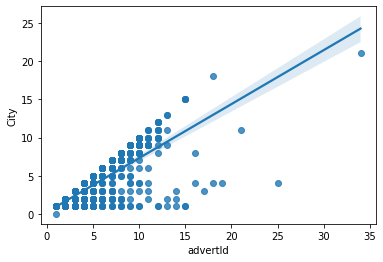

In [87]:
import seaborn as sns
# df = sns.load_dataset('fraud_ads_city')

sns.regplot(x=fraud_ads_city_2023["advertId"], y=fraud_ads_city_2023["City"])

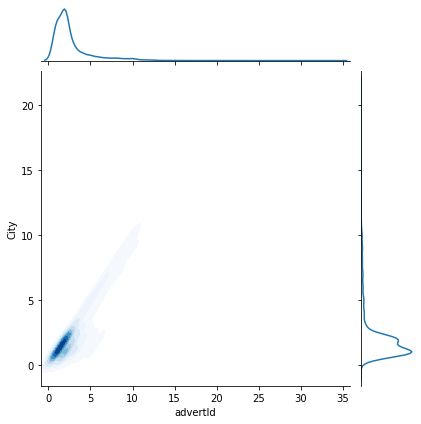

In [88]:
import matplotlib.pyplot as plt
sns.jointplot(x = fraud_ads_city_2023["advertId"], y = fraud_ads_city_2023["City"], cmap="Blues", shade=True, kind='kde')
plt.show()

In [89]:
fraud_ads_city_2023

,globalId,advertId,City
1098,28997186,34,21
224,28543004,25,4
1910,29257210,21,11
212,28542275,19,4
1561,29158019,18,4
...,...,...,...
890,28885991,1,1
2166,29327337,1,1
2165,29327047,1,1
885,28882125,1,1


In [90]:
fraud_ads_city_2023['advertId'].mean()

2.7444258639910815

In [91]:
fraud_ads_city_2023['City'].mean()

2.1884057971014492

### Год выпуска

In [92]:
year_advert = common_2023.groupby('Year').agg({'advertId':'count', 'globalId':'nunique'}).reset_index()

In [93]:
year_advert.sort_values(by = 'advertId', ascending = False)

,Year,advertId,globalId
29,2007,2220,735
30,2008,1253,441
32,2010,462,225
34,2012,409,269
31,2009,380,135
28,2006,307,167
27,2005,247,160
33,2011,229,161
19,1997,219,156
23,2001,218,159


In [94]:
year_advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Year      46 non-null     Int64
 1   advertId  46 non-null     int64
 2   globalId  46 non-null     int64
dtypes: Int64(1), int64(2)
memory usage: 1.2 KB


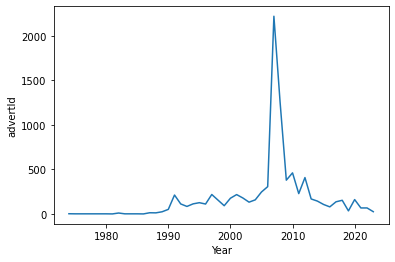

In [95]:
sns.lineplot(data=year_advert, x="Year", y="advertId")
plt.show()

### Цена

In [96]:
common_2023

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
3588,28976059,28976059@auto.kolesa.kz,77054606109,77054606109,2023-02-08,2021-05-23,Обычный продавец,2023,2021,-626,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38207,28877127,28877127@auto.kolesa.kz,77479180848,77479180848,2023-02-02,2022-12-02,Обычный продавец,2023,2022,-62,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40296,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911421.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Автомобили без вложения пишите обязательно отвечу а так автомобиль идеален",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Петропавловск,Северо-Казахстанская область,2023-01-01T17:51:09+06:00,2023-01-01T17:51:35+06:00
40297,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911354.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Пишите обязательно отвечу автомобиль без вложений",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Алматы,Алматинская область,2023-01-01T17:48:37+06:00,2023-01-01T17:49:05+06:00
40298,28313719,28313719@auto.kolesa.kz,77083447889,77083447889,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911810.0,28313719.0,85.117.97.226,Kia Rio 2014 г.,auto.car,"2014 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 150 000 км, Машина идеал без вложений казак учет краска радной тур мотор коробка жаксы урылмаган согылмаган обмен жок озим биринши хозяин без вложений!",Kia,Rio,седан,2014,4100000.0,150000.0,1.6,С пробегом,В наличии,Шымкент,Туркестанская область,2023-01-01T18:06:56+06:00,2023-01-01T18:08:10+06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51508,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223723.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина в идеальном состоянии без вложений и 2011 года звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Шымкент,Туркестанская область,2023-04-04T09:31:26+06:00,2023-04-04T09:33:44+06:00
51509,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223803.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина 2011 года в идеальном состоянии без вложений звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Караганда,Карагандинская область,2023-04-04T09:33:33+06:00,NaN
51510,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151218935.0,29512422.0,85.140.1.133,Volkswagen Passat 2009 г.,auto.car,"2009 г., Б/у седан, 1.8 л, бензин, КПП механика, + 79173149516. Номер ВАП. САП ЗВАНИ ПИШЫ. Автомобиль. Машина 2007 года в идеале в состоянии без вложений находится в России город Сызрань Самарская область есть доставка на территории Казахстана можем договориться по договорённости. Очень срочная продажа",Volkswagen,Passat,седан,2009,1000000.0,0.0,1.8,С пробегом,На заказ,Астана,Акмолинская область,2023-04-04T04:46:45+06:00,2023-04-04T04:48:18+06:00
51511,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-

In [97]:
common_2023['publishedAt'] = pd.to_datetime(common_2023['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f')

C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\799122342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_2023['publishedAt'] = pd.to_datetime(common_2023['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f')


In [146]:
common_2023_week = common_2023[(common_2023['publishedAt'] >= '2023-01-01 00:00:00+06:00') & (common_2023['publishedAt'] <= '2023-04-01 00:00:00+06:00')]

In [147]:
common_2023_week

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
40296,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911421.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Автомобили без вложения пишите обязательно отвечу а так автомобиль идеален",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Петропавловск,Северо-Казахстанская область,2023-01-01T17:51:09+06:00,2023-01-01 17:51:35+06:00
40297,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911354.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Пишите обязательно отвечу автомобиль без вложений",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Алматы,Алматинская область,2023-01-01T17:48:37+06:00,2023-01-01 17:49:05+06:00
40298,28313719,28313719@auto.kolesa.kz,77083447889,77083447889,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911810.0,28313719.0,85.117.97.226,Kia Rio 2014 г.,auto.car,"2014 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 150 000 км, Машина идеал без вложений казак учет краска радной тур мотор коробка жаксы урылмаган согылмаган обмен жок озим биринши хозяин без вложений!",Kia,Rio,седан,2014,4100000.0,150000.0,1.6,С пробегом,В наличии,Шымкент,Туркестанская область,2023-01-01T18:06:56+06:00,2023-01-01 18:08:10+06:00
40300,28313775,28313775@auto.kolesa.kz,77073489651,77073489651,2023-01-01,2023-01-02,Обычный продавец,2023,2023,1,146911980.0,28313775.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, С р о ч н о П. Е. Р. Е. Х. О. Д. И. Т. Е Н А в. А. П. С. А. П 8.9.6.3.9.1.8.4.2.7.3",Hyundai,Solaris,седан,2017,1300000.0,30000.0,1.6,С пробегом,На заказ,Астана,Акмолинская область,2023-01-01T18:14:12+06:00,2023-01-01 18:14:42+06:00
40301,28313775,28313775@auto.kolesa.kz,77073489651,77073489651,2023-01-01,2023-01-02,Обычный продавец,2023,2023,1,146912016.0,28313775.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, С р о ч н о П. Е. Р. Е. Х. О. Д. И. Т. Е НА В. А. П. С. А. П 8.9.6.3.9.1.8.4.2.7.3",Hyundai,Solaris,седан,2017,1300000.0,30000.0,1.6,С пробегом,На заказ,Актобе,Актюбинская область,2023-01-01T18:15:37+06:00,2023-01-01 18:16:03+06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51411,29485627,29485627@auto.kolesa.kz,77714520863,77714520863,2023-03-30,2023-04-03,Обычный продавец,2023,2023,4,151018050.0,29485627.0,46.216.169.13,Audi 80 1992 г.,auto.car,"1992 г., Б/у седан, 2 л, бензин, КПП механика, с пробегом 230 000 км, черный, металлик, В хорошем состоянии без вложений каждый день на ходу масло не жрёт не бита не крашена с документами всё в порядке срочная продажа Звоните если недоступно звоните по без платной связи. Находится в баканасе",Audi,80,седан,1992,850000.0,230000.0,2.0,С пробегом,В наличии,Алматы,Алматинская область,2023-03-31T14:57:08+06:00,2023-03-31 15:00:08+06:00
51412,29485627,29485627@auto.kolesa.kz,77714520863,77714520863,2023-03-30,2023-04-03,Обычный продавец,2023,2023,4,150967327.0,29485627.0,46.216.67.205,Nissan Primera 1998 г.,auto.car,"1998 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 230 000 км, серебристый, металлик, В хорошем состоянии без вложений без гнилья гаражное хранение не дымит масло не ест с документами всё в порядке срочная 

In [148]:
common_2023_week.groupby('mark').agg({"advertId":"nunique"}).reset_index().sort_values(by = 'advertId', ascending = False).to_csv('mark_2023.csv')

In [141]:
common_2022 = common[common['year_created'] == 2022]

In [142]:
common_2022['publishedAt'] = pd.to_datetime(common_2022['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f')

C:\Users\rofman\AppData\Local\Temp\ipykernel_26960\116050038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_2022['publishedAt'] = pd.to_datetime(common_2022['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f')


In [143]:
common_2022_week = common_2022[(common_2022['publishedAt'] >= '2022-01-01 00:00:00+06:00') & (common_2022['publishedAt'] <= '2022-12-31 00:00:00+06:00')]

In [144]:
common_2022_week.groupby('mark').agg({"advertId":"nunique"}).reset_index().sort_values(by = 'advertId', ascending = False).to_csv('mark_2022.csv')

In [145]:
common_2023_week.groupby(['mark', 'Year', 'model']).agg({"advertId":"nunique"}).reset_index().sort_values(by = 'advertId', ascending = False).head(20)

,mark,Year,model,advertId
151,ВАЗ (Lada),2007,Priora 2170 (седан),154
155,ВАЗ (Lada),2008,2121 Нива,33
177,ВАЗ (Lada),2018,2121 Нива,32
121,ВАЗ (Lada),1997,2112 (хэтчбек),24
152,ВАЗ (Lada),2007,Priora 2172 (хэтчбек),23
179,ВАЗ (Lada),2020,Vesta,22
156,ВАЗ (Lada),2008,Priora 2170 (седан),19
113,Volkswagen,2010,Passat,14
122,ВАЗ (Lada),1997,2121 Нива,12
124,ВАЗ (Lada),1998,2110 (седан),10


In [102]:
common_2023_week[(common_2023_week['mark'] == 'ВАЗ (Lada)') & (common_2023_week['Year'] == 2007)].groupby(['mark', 'Year', 'model']).agg({"price":"mean"}).reset_index().sort_values(by = 'price', ascending = False)

,mark,Year,model,price
1,ВАЗ (Lada),2007,2121 Нива,1.400000e+06
3,ВАЗ (Lada),2007,Priora 2172 (хэтчбек),8.934783e+05
0,ВАЗ (Lada),2007,2114 (хэтчбек),8.500000e+05
2,ВАЗ (Lada),2007,Priora 2170 (седан),7.405844e+05


In [103]:
common_2023_week[(common_2023_week['mark'] == 'ВАЗ (Lada)') & (common_2023_week['Year'] == 2007)]

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
43440,29031407,29031407@auto.kolesa.kz,77075182604,77075182604,2023-02-12,2023-02-12,Обычный продавец,2023,2023,0,148686469.0,29031407.0,146.70.140.2,ВАЗ (Lada) Priora 2170 (седан) 2007 г.,auto.car,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, с пробегом 100 000 км, серый, 89639184312 Вот по этому номеру переходите на обязательно отвечу автомобиль 2014 года выпуска в идеальном состоянии казахстанский учёт автомобиль находится в России могу перегнать в Казахстан в любой город срочная продажа звоните цена машины 700.000 тенге",ВАЗ (Lada),Priora 2170 (седан),седан,2007,1550000.0,100000.0,1.6,С пробегом,В наличии,Астана,Акмолинская область,2023-02-12T10:41:09+06:00,2023-02-12 10:42:11+06:00
43549,29031449,29031449@auto.kolesa.kz,77075177655,77075177655,2023-02-12,2023-02-13,Обычный продавец,2023,2023,1,148686628.0,29031449.0,85.140.7.10,ВАЗ (Lada) Priora 2170 (седан) 2007 г.,auto.car,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, 89170529845 Позвоните пишите на этот номер который указан в тексте очень срочно продаю автомобиль LADA Priora 2017 года в идеальном состоянии не билось не красилась автомобиль на заказ на территории Казахстана звоните пишите на этот номер89170529845",ВАЗ (Lada),Priora 2170 (седан),седан,2007,600000.0,0.0,1.6,С пробегом,На заказ,Тараз,Жамбылская область,2023-02-12T10:46:29+06:00,2023-02-12 10:47:12+06:00
43550,29031449,29031449@auto.kolesa.kz,77075177655,77075177655,2023-02-12,2023-02-13,Обычный продавец,2023,2023,1,148686575.0,29031449.0,85.140.7.10,ВАЗ (Lada) Priora 2170 (седан) 2007 г.,auto.car,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, 89170529845 звоните пишите на этот номер который указан в тексте очень срочно продаю автомобиль LADA Priora 2017 года не билось не красилась автомобиль на заказ на территории Казахстана музыка кондиционера автозапуск зимней резины кондиционер звоните на этот номер который89170529845",ВАЗ (Lada),Priora 2170 (седан),седан,2007,600000.0,0.0,1.6,С пробегом,На заказ,Астана,Акмолинская область,2023-02-12T10:44:34+06:00,2023-02-12 10:50:35+06:00
43568,29048964,29048964@auto.kolesa.kz,77786834607,77786834607,2023-02-13,2023-02-14,Продавец в авто,2023,2023,1,148741813.0,29048964.0,85.140.5.57,ВАЗ (Lada) Priora 2170 (седан) 2007 г.,auto.car,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, 89170529845 звоните пишите на этот номер который указан текст очень срочно продаю автомобиль LADA Priora 2016 года белый цвет седан не билась не красилась автомобиль на заказ на территории Казахстана музыка кондиционера автозапуск зимняя резина летняя резина звоните пишите на этот номер который указан в тексте89170529845",ВАЗ (Lada),Priora 2170 (седан),седан,2007,600000.0,0.0,1.6,С пробегом,На заказ,Алматы,Алматинская область,2023-02-13T13:42:44+06:00,2023-02-13 13:52:33+06:00
43569,29048964,29048964@auto.kolesa.kz,77786834607,77786834607,2023-02-13,2023-02-14,Продавец в авто,2023,2023,1,148741858.0,29048964.0,85.140.5.57,ВАЗ (Lada) Priora 2170 (седан) 2007 г.,auto.car,"2007 г., Б/у седан, 1.6 л, бензин, КПП механика, 89170529845 звоните пишите на этот номер очень срочно продаю автомобиль LADA Priora 2016 года не билась не красилась автомобиль на заказ на территории Казахстана музыка кондиционер зимняя резина летняя резина звоните пишите срочная продажа звоните на этот номер который89170529845",ВАЗ (Lada),Priora 2170 (седан),седан,2007,600000.0,0.0,1.6,С пробегом,На заказ,Астана,Акмолинская область,2023-02-13T13:43:24+06:00,2023-02-13 13:52:31+06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44320,29124098,29124098@auto.kolesa.kz,77083978993,77083978993,2023-02-18,2023-02-18,Обычный продавец,2023,2023,0,148989473.0,29124098.0,91.232.105.145,ВАЗ (Lada) Prio

In [104]:
common_2023_week[(common_2023_week['mark'] == 'Volkswagen') & (common_2023_week['Year'] == 2010)].groupby(['mark', 'Year', 'model']).agg({"price":"mean"}).reset_index().sort_values(by = 'price', ascending = False)

,mark,Year,model,price
0,Volkswagen,2010,Passat,1200000.0


In [105]:
common_2023_week[(common_2023_week['mark'] == 'Volkswagen') & (common_2023_week['Year'] == 2010)]

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
43726,29069689,29069689@auto.kolesa.kz,77767778721,77767778721,2023-02-14,2023-02-14,Обычный продавец,2023,2023,0,148815372.0,29069689.0,10.252.24.99,Volkswagen Passat 2010 г.,auto.car,"2010 г., Б/у седан, 2 л, бензин, КПП робот, с пробегом 75 000 км, синий, Продаю volkswagen passat CC 2011 года машина в идеальном состоянии не битая не крашеная полный люкс машина на казахском учёте машина без вложений звоните на на этот номер 89037639854",Volkswagen,Passat,седан,2010,1200000.0,75000.0,2.0,С пробегом,На заказ,Астана,Акмолинская область,2023-02-14T20:04:12+06:00,2023-02-14 20:07:36+06:00
43727,29069689,29069689@auto.kolesa.kz,77767778721,77767778721,2023-02-14,2023-02-14,Обычный продавец,2023,2023,0,148815808.0,29069689.0,10.252.24.99,Volkswagen Passat 2010 г.,auto.car,"2010 г., Б/у седан, 2 л, бензин, КПП робот, с пробегом 75 000 км, синий, Продаю volkswagen passat CC 2011 года машина в идеальном состоянии не битая не крашеная полный люкс машина на казахском учёте машина без вложений звоните на на этот номер 89037639854",Volkswagen,Passat,седан,2010,1200000.0,75000.0,2.0,С пробегом,На заказ,Алматы,Алматинская область,2023-02-14T20:14:20+06:00,2023-02-14 20:19:39+06:00
43729,29069689,29069689@auto.kolesa.kz,77767778721,77767778721,2023-02-14,2023-02-14,Обычный продавец,2023,2023,0,148816516.0,29069689.0,10.252.24.99,Volkswagen Passat 2010 г.,auto.car,"2010 г., Б/у седан, 2 л, бензин, КПП робот, с пробегом 75 000 км, синий, Продаю volkswagen passat CC 2011 года машина в идеальном состоянии не битая не крашеная полный люкс машина на казахском учёте машина без вложений звоните на на этот номер 89037639854",Volkswagen,Passat,седан,2010,1200000.0,75000.0,2.0,С пробегом,На заказ,Атырау,Атырауская область,2023-02-14T20:30:22+06:00,2023-02-14 20:32:36+06:00
43730,29069689,29069689@auto.kolesa.kz,77767778721,77767778721,2023-02-14,2023-02-14,Обычный продавец,2023,2023,0,148815503.0,29069689.0,10.252.24.99,Volkswagen Passat 2010 г.,auto.car,"2010 г., Б/у седан, 2 л, бензин, КПП робот, с пробегом 75 000 км, синий, Продаю volkswagen passat CC 2011 года машина в идеальном состоянии не битая не крашеная полный люкс машина на казахском учёте машина без вложений звоните на на этот номер 89037639854",Volkswagen,Passat,седан,2010,1200000.0,75000.0,2.0,С пробегом,На заказ,Караганда,Карагандинская область,2023-02-14T20:07:35+06:00,2023-02-14 20:08:57+06:00
43731,29069689,29069689@auto.kolesa.kz,77767778721,77767778721,2023-02-14,2023-02-14,Обычный продавец,2023,2023,0,148816036.0,29069689.0,10.252.24.99,Volkswagen Passat 2010 г.,auto.car,"2010 г., Б/у седан, 2 л, бензин, КПП робот, с пробегом 75 000 км, синий, Продаю volkswagen passat CC 2011 года машина в идеальном состоянии не битая не крашеная полный люкс машина на казахском учёте машина без вложений звоните на на этот номер 89037639854",Volkswagen,Passat,седан,2010,1200000.0,75000.0,2.0,С пробегом,На заказ,Костанай,Костанайская область,2023-02-14T20:19:27+06:00,2023-02-14 20:21:35+06:00
43744,29071280,29071280@auto.kolesa.kz,77781024941,77781024941,2023-02-14,2023-02-15,Обычный продавец,2023,2023,1,148820105.0,29071280.0,10.252.24.99,Volkswagen Passat 2010 г.,auto.car,"2010 г., Б/у седан, 2 л, бензин, КПП робот, с пробегом 75 000 км, синий, Продаю volkswagen passat CC 2011 года машина в идеальном состоянии не битая не крашеная полный люкс машина на казахском учёте машина без вложений звоните на на этот номер 89037639854",Volkswagen,Passat,седан,2010,1200000.0,75000.0,2.0,С пробегом,На заказ,Астана,Акмолинская область,2023-02-14T21:55:30+06:00,2023-02-14 21:57:09+06:00
43745,29071280,29071280@auto.kolesa.kz,77781024941,77781024941,2023-02-14,2023-02-15,Обычный продавец,2023,2023,1,148820268.0,29071280.0,10.252.24.99,Volkswagen Passat 2010 г.,aut

### На заказ

In [106]:
common_2023.groupby('status').agg({'advertId':'nunique'})

,advertId
status,
В наличии,5523
На заказ,3210


In [115]:
blocked_2023_1 = df_users[df_users['year_blocked'] == 2023]
blocked_2022_1 = df_users[df_users['year_blocked'] == 2022]
blocked_2021_1 = df_users[df_users['year_blocked'] == 2021]
blocked_2020_1 = df_users[df_users['year_blocked'] == 2020]

In [117]:
blocked_2023_1

,globalId,email,phone,verifiedPhones,createdAt,blockedAt,advertsCount,userType,year_created,year_blocked,days_to_block
3954,23104952,23104952@auto.kolesa.kz,77022722650,77022722650,2021-07-16,2023-02-18,33,Продавец в авто,2021,2023,582
8044,23901785,23901785@auto.kolesa.kz,77765445550,77765445550,2021-10-31,2023-02-18,7,Обычный продавец,2021,2023,475
9311,25028907,25028907@auto.kolesa.kz,77028928070,77028928070,2022-04-05,2023-02-04,13,Обычный продавец,2022,2023,305
10085,26347510,26347510@auto.kolesa.kz,77788564762,77788564762,2022-09-05,2023-02-09,7,Обычный продавец,2022,2023,157
12269,28280427,28280427@auto.kolesa.kz,77083187791,77083187791,2022-12-29,2023-01-02,3,Обычный продавец,2022,2023,4
...,...,...,...,...,...,...,...,...,...,...,...
16068,29510684,29510684@auto.kolesa.kz,77471259752,77471259752,2023-04-03,2023-04-04,2,Обычный продавец,2023,2023,1
16069,29510080,29510080@auto.kolesa.kz,77471245267,77471245267,2023-04-03,2023-04-04,1,Обычный продавец,2023,2023,1
16070,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,2,Обычный продавец,2023,2023,0
16071,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-04-04,2023-04-04,2,Обычный продавец,2023,2023,0


In [111]:
blocked_2022_1['globalId'].nunique()

4741

In [118]:
blocked_2022_1['advertsCount'].mean()

2.5060113900021093

In [112]:
blocked_2023_1['globalId'].nunique()

3796

In [120]:
blocked_2023_1['advertsCount'].mean()

3.0260800842992626

In [114]:
blocked_2021_1['globalId'].nunique()

6825

In [121]:
blocked_2021_1['advertsCount'].mean()

4.043663003663004

In [116]:
blocked_2020_1['globalId'].nunique()

3

In [122]:
common_2023

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
3588,28976059,28976059@auto.kolesa.kz,77054606109,77054606109,2023-02-08,2021-05-23,Обычный продавец,2023,2021,-626,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
38207,28877127,28877127@auto.kolesa.kz,77479180848,77479180848,2023-02-02,2022-12-02,Обычный продавец,2023,2022,-62,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40296,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911421.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Автомобили без вложения пишите обязательно отвечу а так автомобиль идеален",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Петропавловск,Северо-Казахстанская область,2023-01-01T17:51:09+06:00,2023-01-01 17:51:35+06:00
40297,28313512,28313512@auto.kolesa.kz,77052764250,77052764250,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911354.0,28313512.0,217.118.90.144,Hyundai Solaris 2017 г.,auto.car,"2017 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 30 000 км, белый, металлик, вложений не требует, Пишите обязательно отвечу автомобиль без вложений",Hyundai,Solaris,седан,2017,1000000.0,30000.0,1.6,С пробегом,На заказ,Алматы,Алматинская область,2023-01-01T17:48:37+06:00,2023-01-01 17:49:05+06:00
40298,28313719,28313719@auto.kolesa.kz,77083447889,77083447889,2023-01-01,2023-01-01,Обычный продавец,2023,2023,0,146911810.0,28313719.0,85.117.97.226,Kia Rio 2014 г.,auto.car,"2014 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 150 000 км, Машина идеал без вложений казак учет краска радной тур мотор коробка жаксы урылмаган согылмаган обмен жок озим биринши хозяин без вложений!",Kia,Rio,седан,2014,4100000.0,150000.0,1.6,С пробегом,В наличии,Шымкент,Туркестанская область,2023-01-01T18:06:56+06:00,2023-01-01 18:08:10+06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51508,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223723.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина в идеальном состоянии без вложений и 2011 года звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Шымкент,Туркестанская область,2023-04-04T09:31:26+06:00,2023-04-04 09:33:44+06:00
51509,29512864,29512864@auto.kolesa.kz,77476802604,77476802604,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151223803.0,29512864.0,190.2.142.106,Toyota Camry 1991 г.,auto.car,"1991 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 94 000 км, Машина 2011 года в идеальном состоянии без вложений звоните пишите в любое время на этот номер",Toyota,Camry,седан,1991,1900000.0,94000.0,2.5,С пробегом,В наличии,Караганда,Карагандинская область,2023-04-04T09:33:33+06:00,NaT
51510,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-04-04,2023-04-04,Обычный продавец,2023,2023,0,151218935.0,29512422.0,85.140.1.133,Volkswagen Passat 2009 г.,auto.car,"2009 г., Б/у седан, 1.8 л, бензин, КПП механика, + 79173149516. Номер ВАП. САП ЗВАНИ ПИШЫ. Автомобиль. Машина 2007 года в идеале в состоянии без вложений находится в России город Сызрань Самарская область есть доставка на территории Казахстана можем договориться по договорённости. Очень срочная продажа",Volkswagen,Passat,седан,2009,1000000.0,0.0,1.8,С пробегом,На заказ,Астана,Акмолинская область,2023-04-04T04:46:45+06:00,2023-04-04 04:48:18+06:00
51511,29512422,29512422@auto.kolesa.kz,77059946635,77059946635,2023-

In [126]:
common_2023[common_2023['category'] != 'auto.car'].head(60)

,globalId,email,phone,verifiedPhones,createdAt_x,blockedAt,userType,year_created,year_blocked,days_to_block,advertId,userId,ip,title,category,description,mark,model,bodyType,Year,price,Milliage,Vlolume,Condition,status,City,Region,createdAt_y,publishedAt
3588,28976059,28976059@auto.kolesa.kz,77054606109,77054606109,2023-02-08,2021-05-23,Обычный продавец,2023,2021,-626,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
38207,28877127,28877127@auto.kolesa.kz,77479180848,77479180848,2023-02-02,2022-12-02,Обычный продавец,2023,2022,-62,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40508,28364662,28364662@auto.kolesa.kz,77781887291,77781887291,2023-01-05,2023-01-07,Обычный продавец,2023,2023,2,147103104.0,28364662.0,92.114.187.68,МТЗ 82.1 2003 г.,auto.spec,"2003 г., трактор (Беларусь), дизель, с пробегом, Трактор в идеальном состоянии всё на ходу без вложения могу скинуть видео пару фоток звоните пишите в",NaN,NaN,NaN,2003,2000000.0,NaN,NaN,NaN,В наличии,Мерке,Жамбылская область,2023-01-06T20:55:22+06:00,2023-01-06 21:13:25+06:00
40509,28364662,28364662@auto.kolesa.kz,77781887291,77781887291,2023-01-05,2023-01-07,Обычный продавец,2023,2023,2,147031698.0,28364662.0,92.114.187.68,Polaris 500 2014 г.,auto.moto,"2014 г., снегоход, с пробегом, Продам снегоход в полном рабочее состояние могу скинуть видео фотографии есть заставка по всему Казахстану могу скинуть видео",Polaris,500,NaN,2014,850000.0,NaN,NaN,NaN,NaN,Алматы,Алматинская область,2023-01-05T08:07:19+06:00,2023-01-05 08:24:26+06:00
40529,28381252,28381252@auto.kolesa.kz,77027083950,77027083950,2023-01-06,2023-01-08,Обычный продавец,2023,2023,2,147121459.0,28381252.0,176.108.199.245,NaN,auto.spec,NaN,NaN,NaN,NaN,<NA>,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-07T12:59:36+06:00,NaT
40530,28381252,28381252@auto.kolesa.kz,77027083950,77027083950,2023-01-06,2023-01-08,Обычный продавец,2023,2023,2,147073511.0,28381252.0,176.108.199.245,МТЗ 82.1 2016 г.,auto.spec,"2016 г., трактор (Беларусь), дизель, с пробегом, Пишите звоните продам трактор в отличном состоянии Беларусь мтз-82.1 трактор в отличном состоянии Никаких вложений не требуется Сел и поехал пишите звоните есть доставка по всему по всему Казахстан",NaN,NaN,NaN,2016,3500000.0,NaN,NaN,NaN,В наличии,Костанай,Костанайская область,2023-01-06T04:40:54+06:00,2023-01-06 04:41:42+06:00
40531,28381252,28381252@auto.kolesa.kz,77027083950,77027083950,2023-01-06,2023-01-08,Обычный продавец,2023,2023,2,147073639.0,28381252.0,176.108.199.245,МТЗ 82.1 2016 г.,auto.spec,"2016 г., трактор (Беларусь), дизель, с пробегом, Пишите звоните продам трактор мтз-82.1 трактор в отличном состоянии Никаких вложений не требуется Сел и поехал есть доставка по всему Казахстану пишите звоните",NaN,NaN,NaN,2016,300000.0,NaN,NaN,NaN,В наличии,Актобе,Актюбинская область,2023-01-06T05:36:36+06:00,2023-01-06 05:37:27+06:00
40540,28423747,28423747@auto.kolesa.kz,77472802544,77472802544,2023-01-08,2023-01-08,Обычный продавец,2023,2023,0,147173603.0,28423747.0,94.139.136.130,МТЗ 82.1 2010 г.,auto.spec,"2010 г., трактор (Беларусь), дизель, с пробегом, Продам трактор МТЗ 82.1 в очень хорошем состоянии вложений никаких не требуется резина тоже новая могу скинуть дополнительные фото также видео звоните пишите",NaN,NaN,NaN,2010,1100000.0,NaN,NaN,NaN,В наличии,Алматы,Алматинская область,2023-01-08T18:42:58+06:00,NaT
40546,28431259,28431259@auto.kolesa.kz,77051582081,77051582081,2023-01-09,2023-01-09,Обычный продавец,2023,2023,0,147190917.0,28431259.0,89.42.62.111,Авторазбор,shop.spare.parts,Авторазбор для всех видов авто. У нас вы найдете запчасти для Вашего авто по лучшим ценам. В нашем магазине вы можете приобрести нужную Вам запчасть в наличие и на заказ. Контрактные ДВС АКПП МКПП. Отправка по регионам,Audi<br />BMW<br />Honda<br />Hyundai<br />Lexus<br />Mazda<br />Mercedes-Benz<br />Mitsubishi<br />Nissan,NaN,NaN,<NA>,0.0,NaN,NaN,NaN,NaN,Астана,Акмолинская область,2023-01-09T08:48:43+06:00,NaT
40547,28431259,28431259@